In [22]:
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from music21 import converter

ABC Measures: 36
PNG Measures: 27


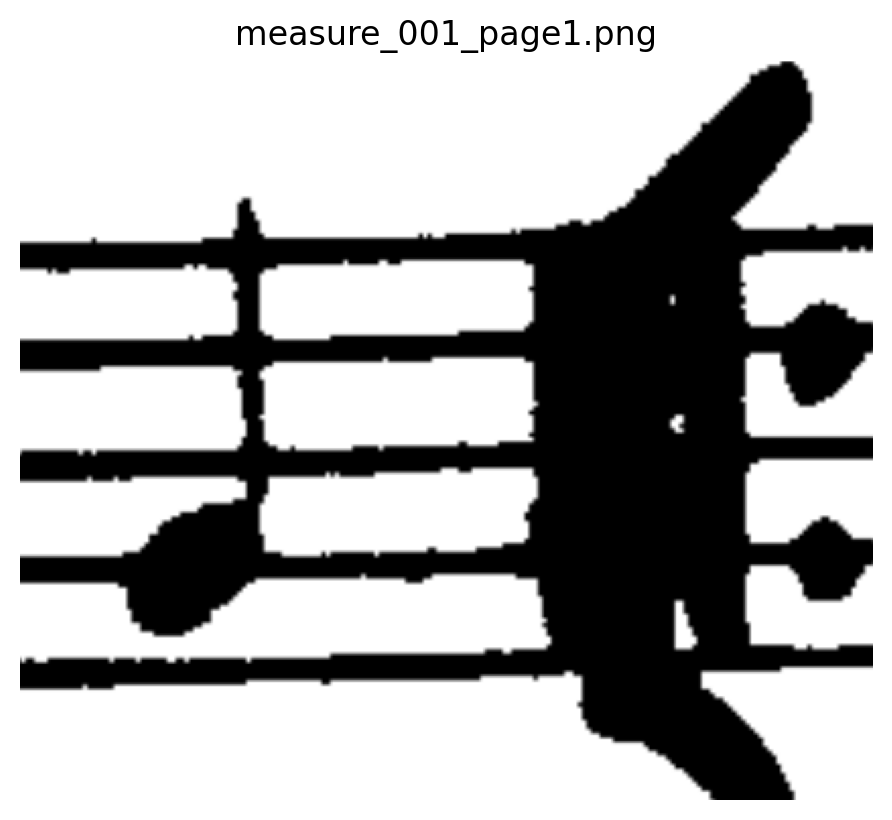

"Dm7" AD"G7"EF"Cmaj7" GB"Am7"GE



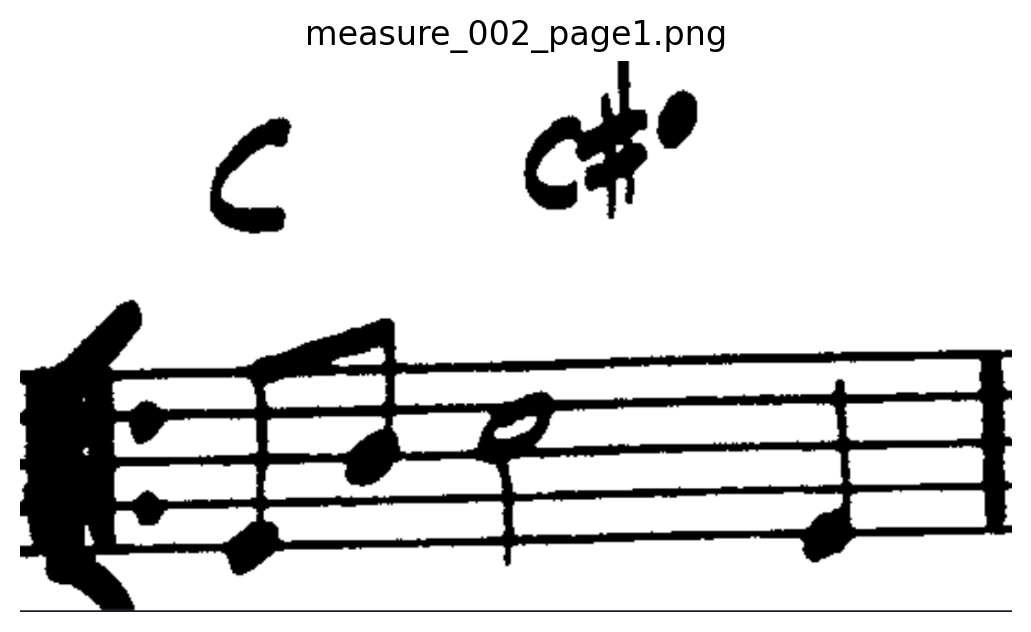

"Dm7" z A/D/"G7" EF"Cmaj7" GB"A7b9" _B2



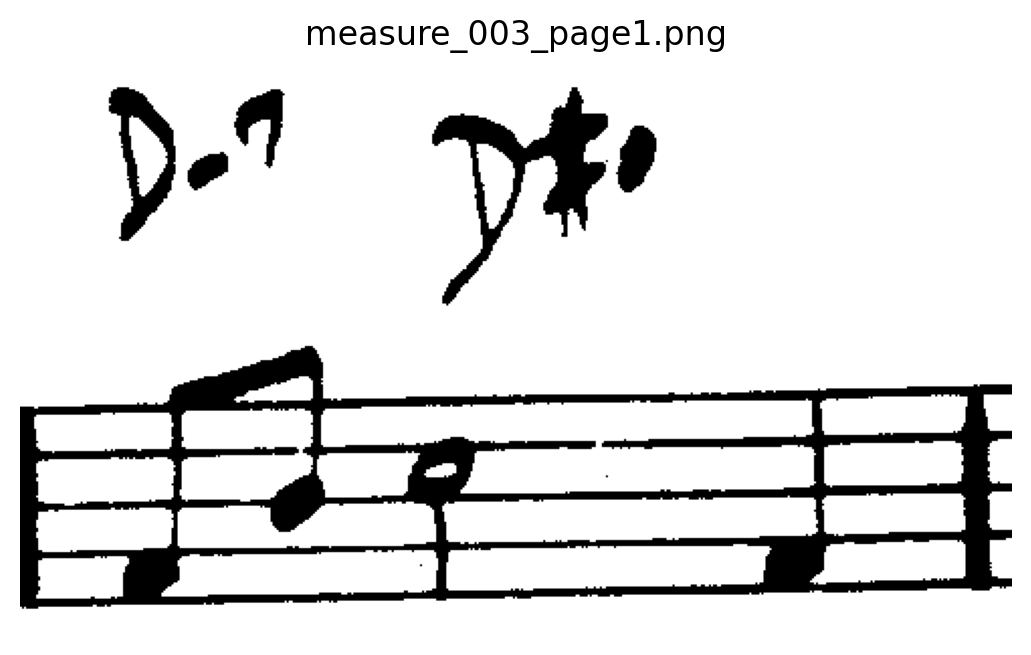

"Dm7" AD"G7"EF G"Cmaj7"d=B"Am7"G



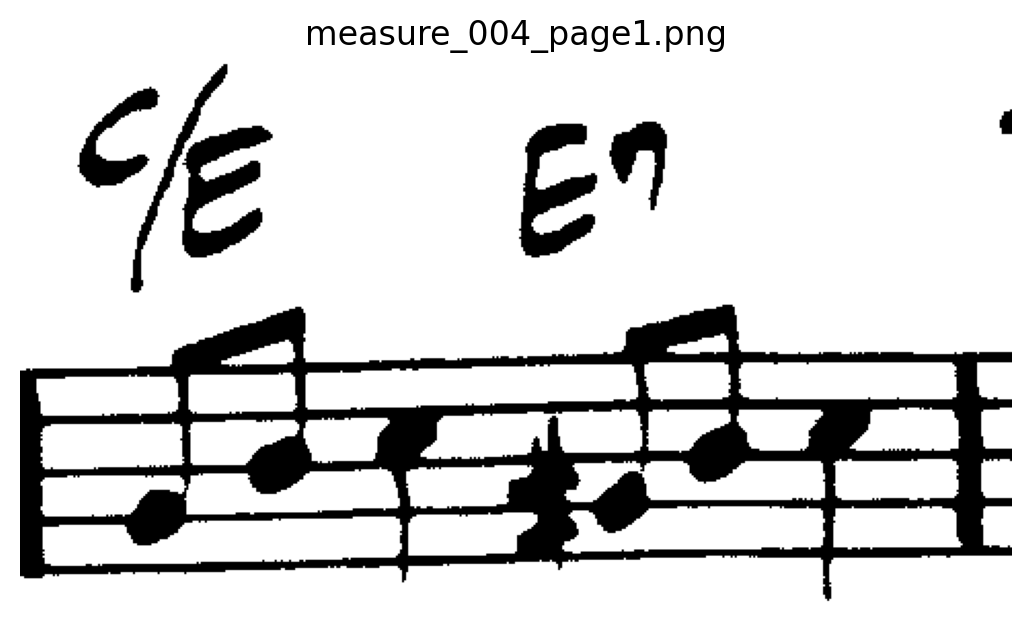

"Dm7" Fc"G9"AF"Cmaj7" E4"Dm7""Em7""Ebm7"



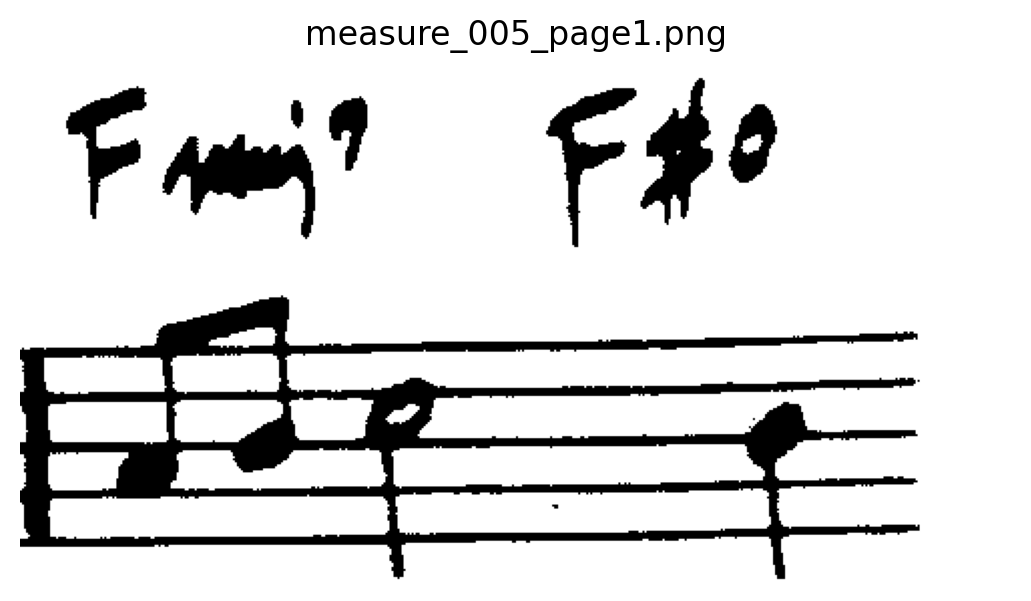

"Dm7" z A/D/"G7" EF"Cmaj7" GB"Am7"GE



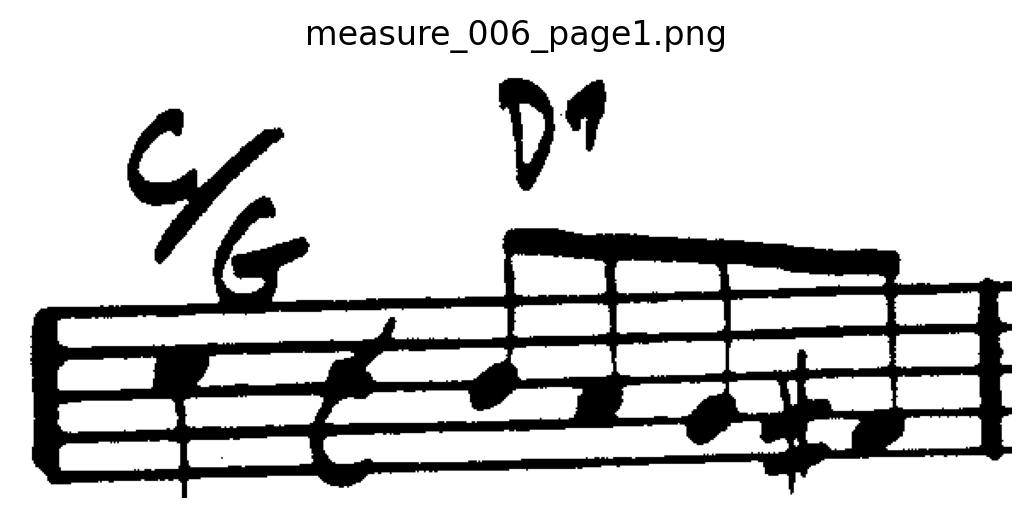

"Dm7" z A/D/"G7" EF"Cmaj7" GB"A7b9" _B2



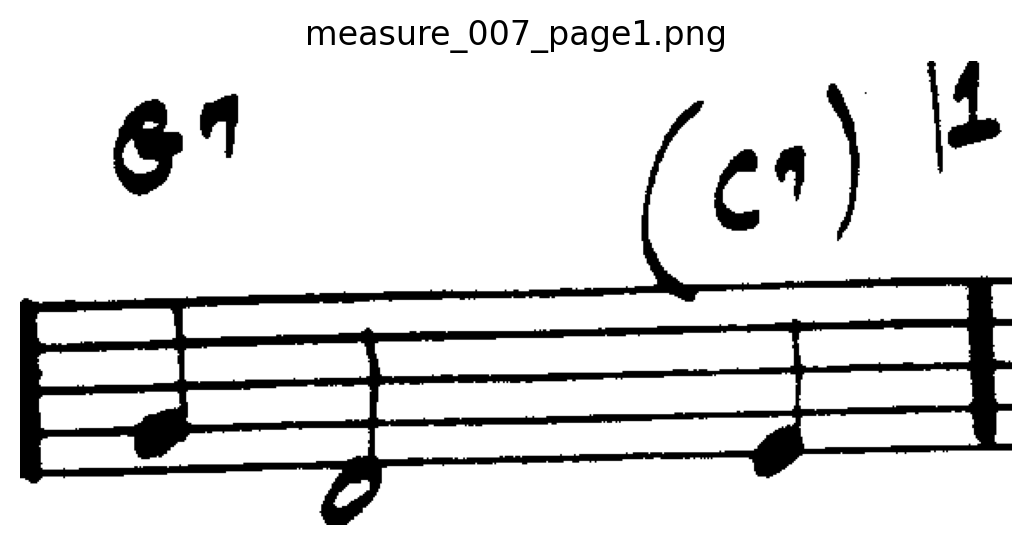

"Dm7" AD"G7"EF"Cmaj7" Gd"Em7"=BG



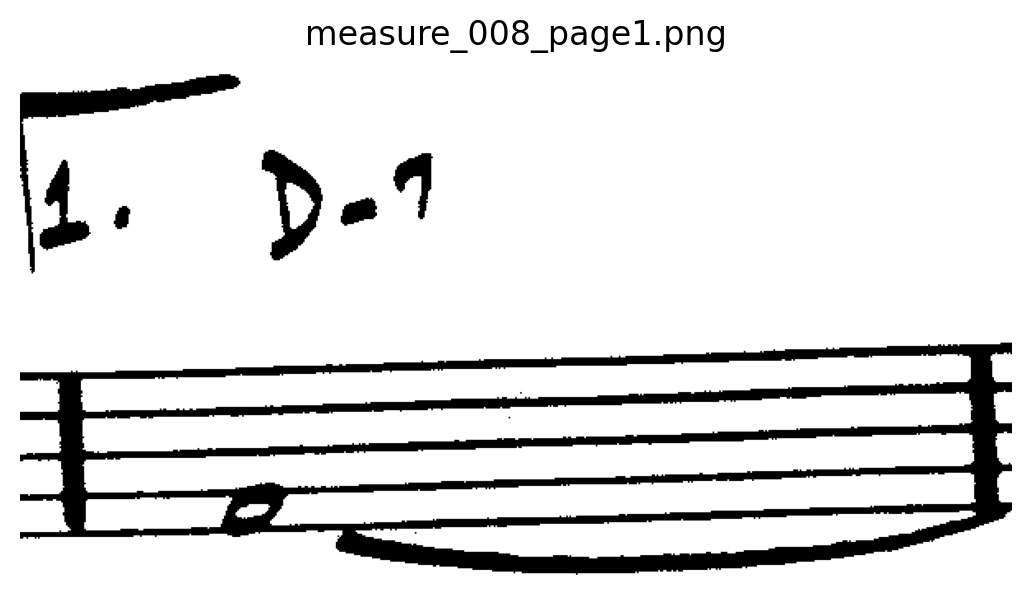

"Dm7" FcAF"F/G" G2"F""Em7" G2"Dm7"



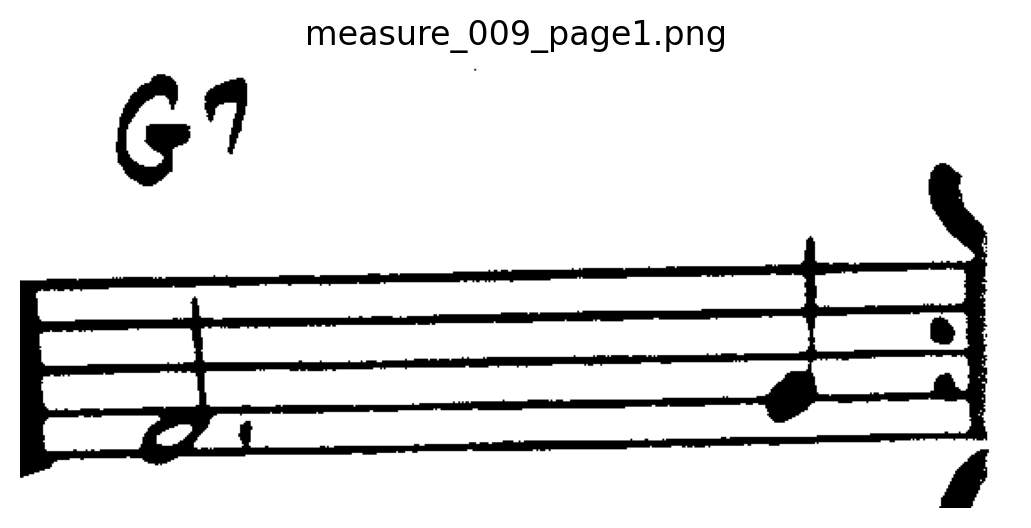

"C" EB c4"C#dim7" E2



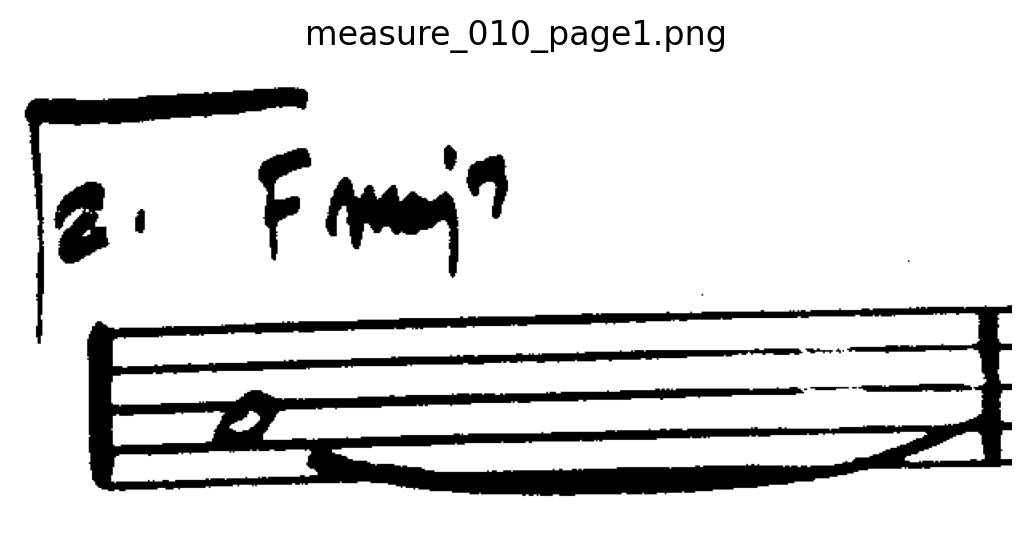

"Dm7" FB c4"D#dim7" F2



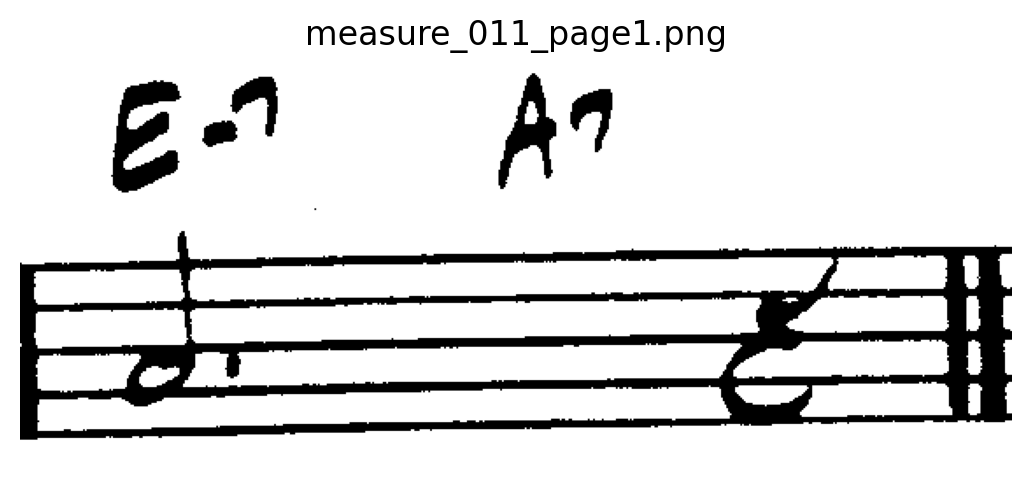

"C" GB c2"E7" ^GB c2



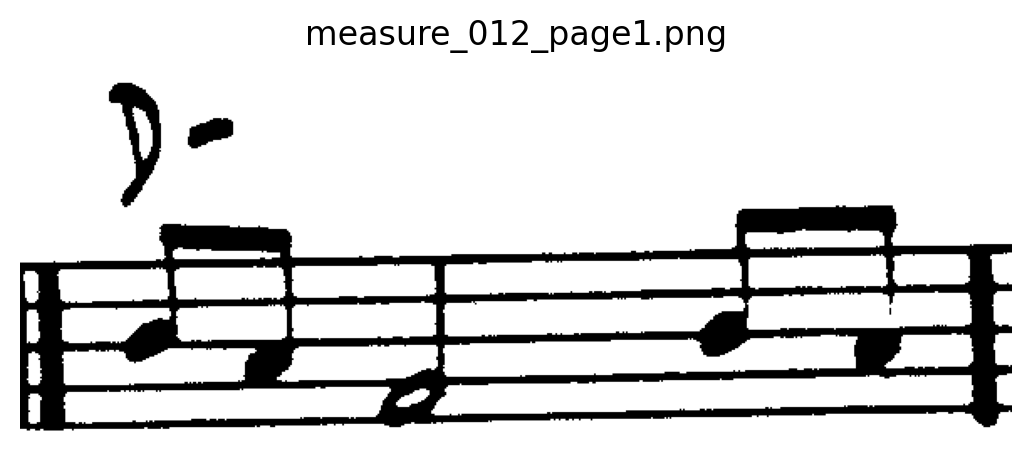

"Fmaj7" AB c4"F#dim7" B2



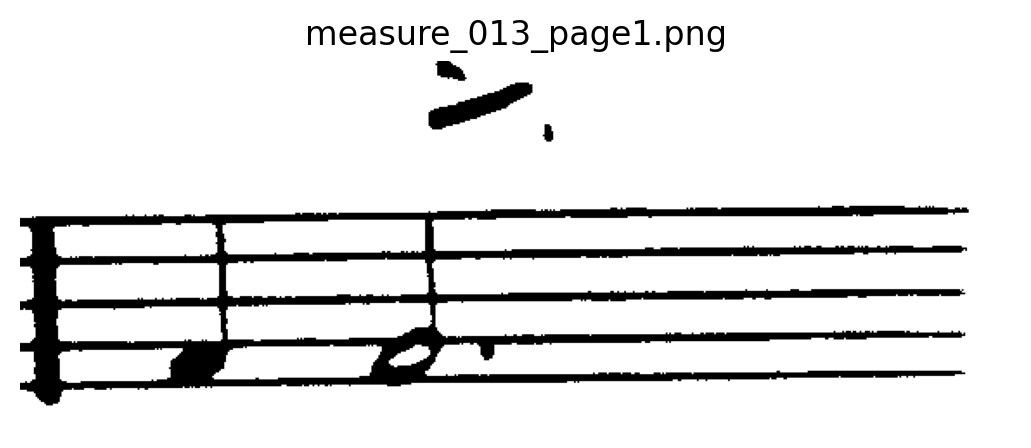

1"C" c2 z2"D7" BAG^F



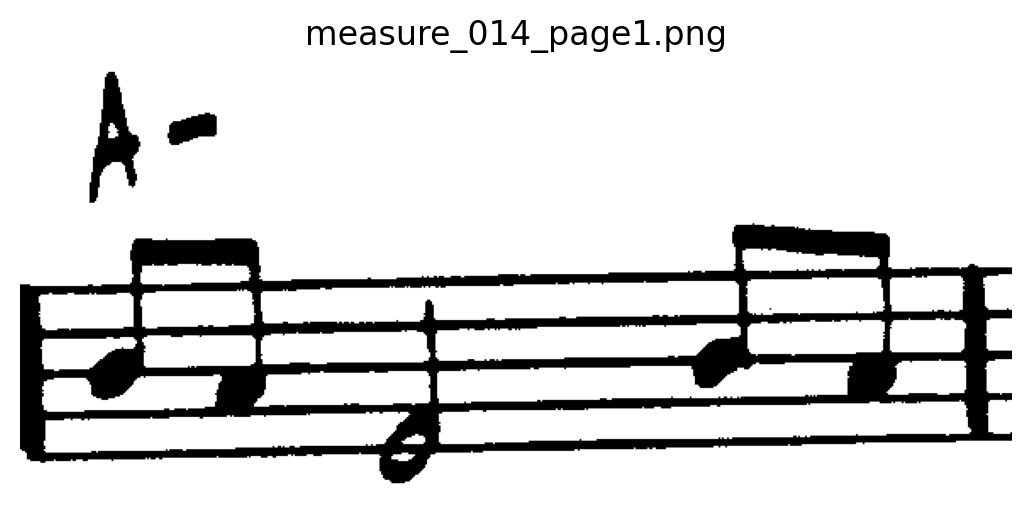

"G7" G2 D4"A7" E2



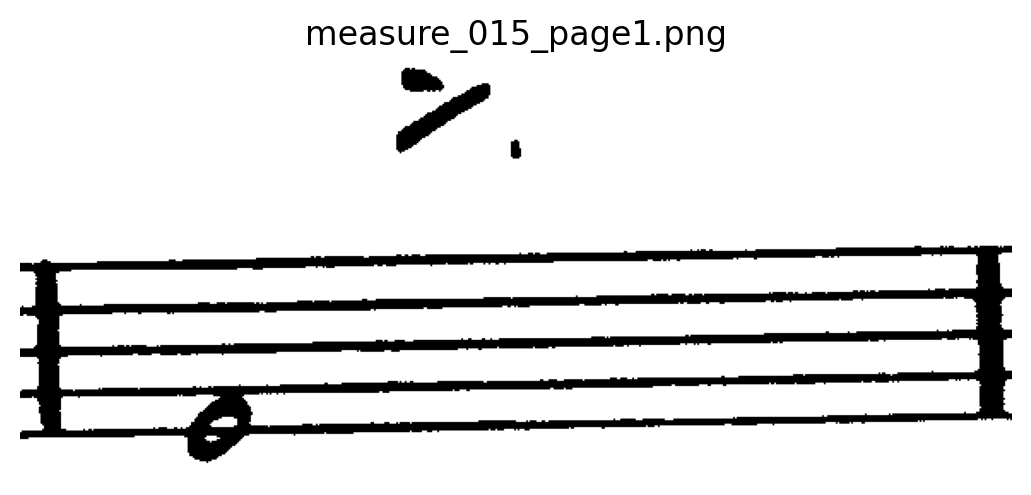

"Dm7" F8-



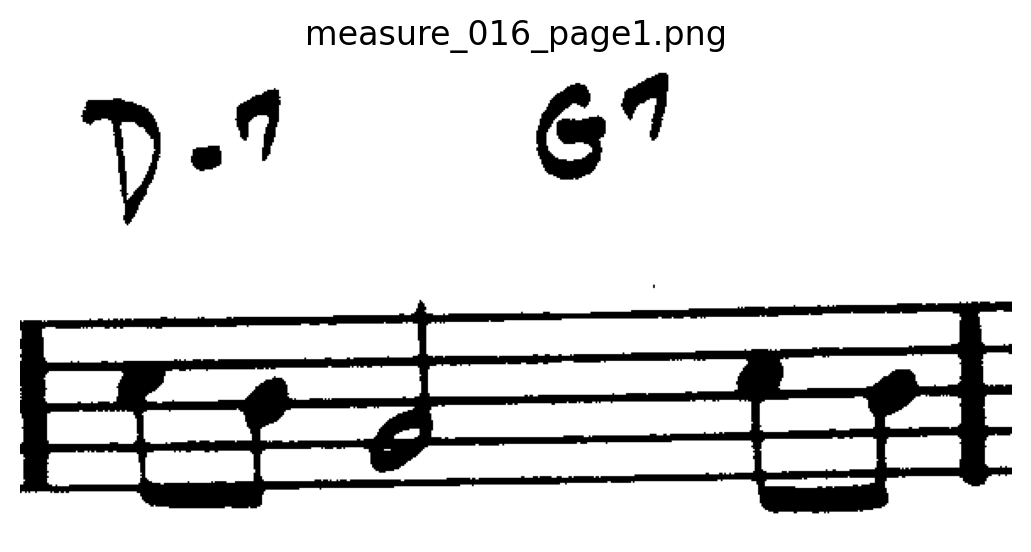

"G7" F4 z4 



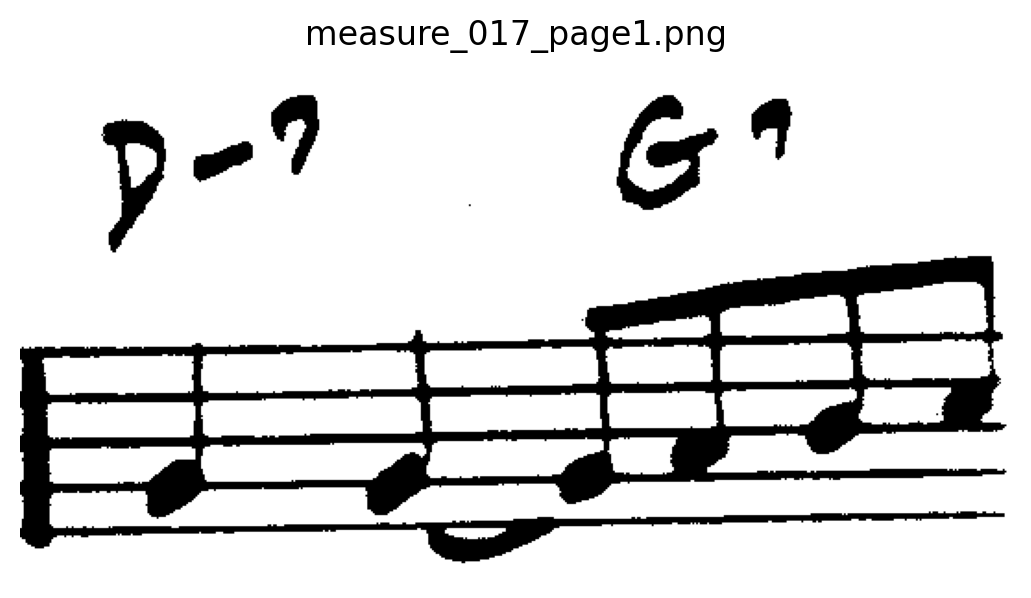

2"C" c2 z2"D7" BAG^F



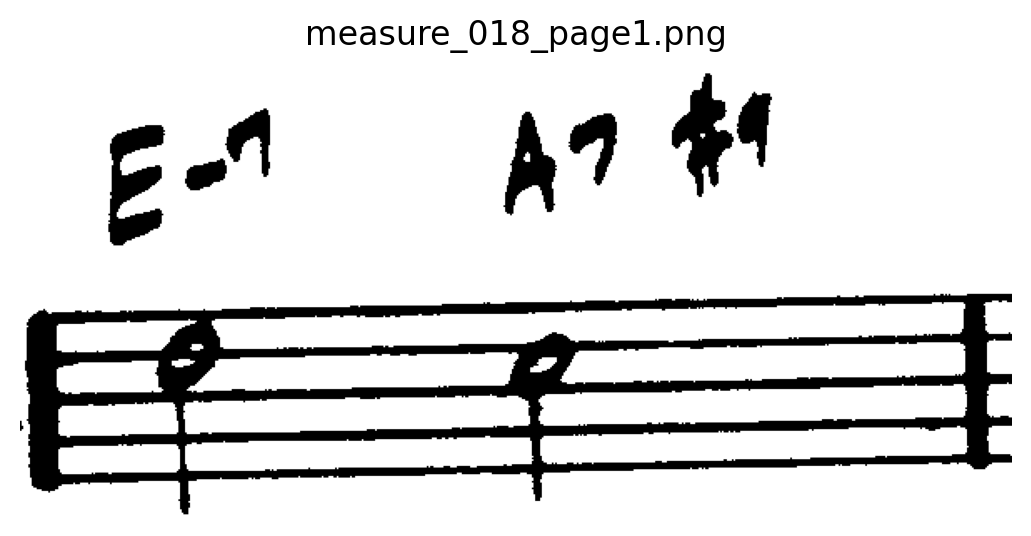

"G7" G2 D4"Gm7""C7" E2



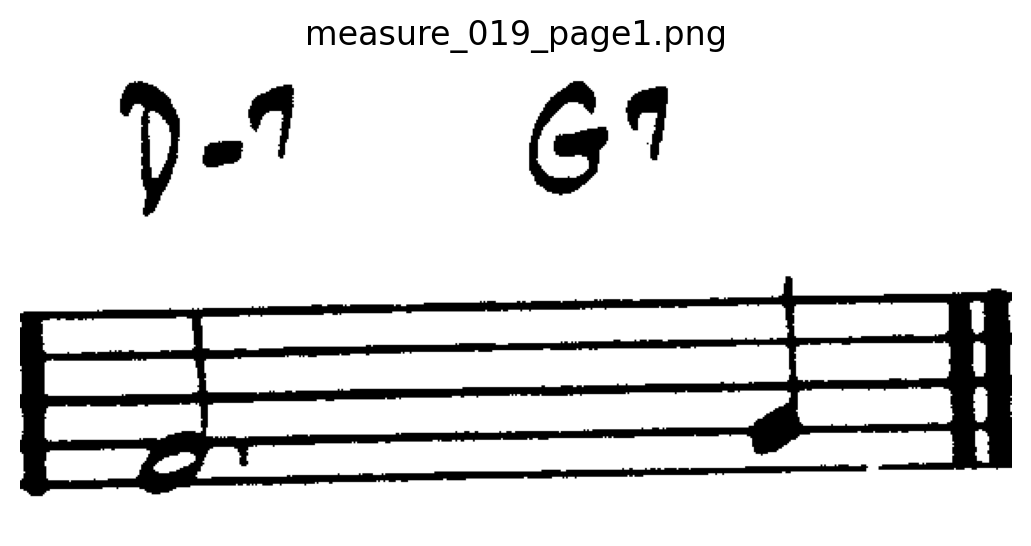

"Fmaj7" A8-



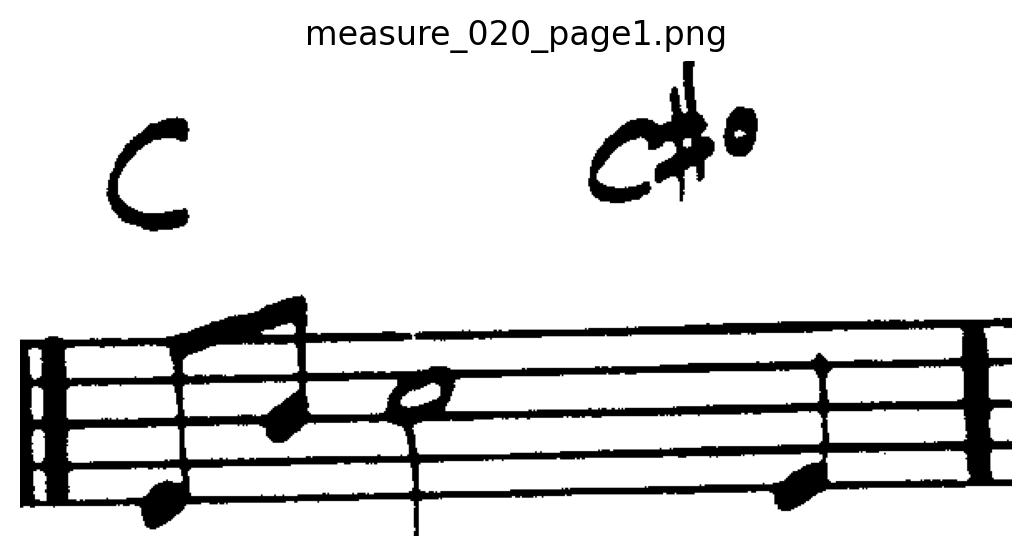

A6"Dsus4/E""A7" z2



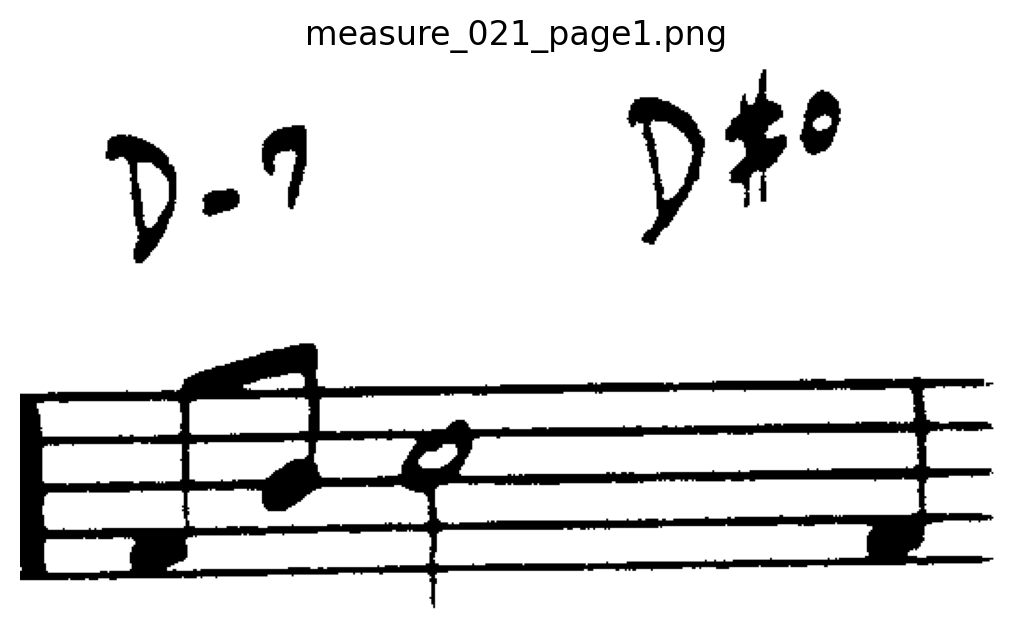

"Dm" BA F4"A+" BA



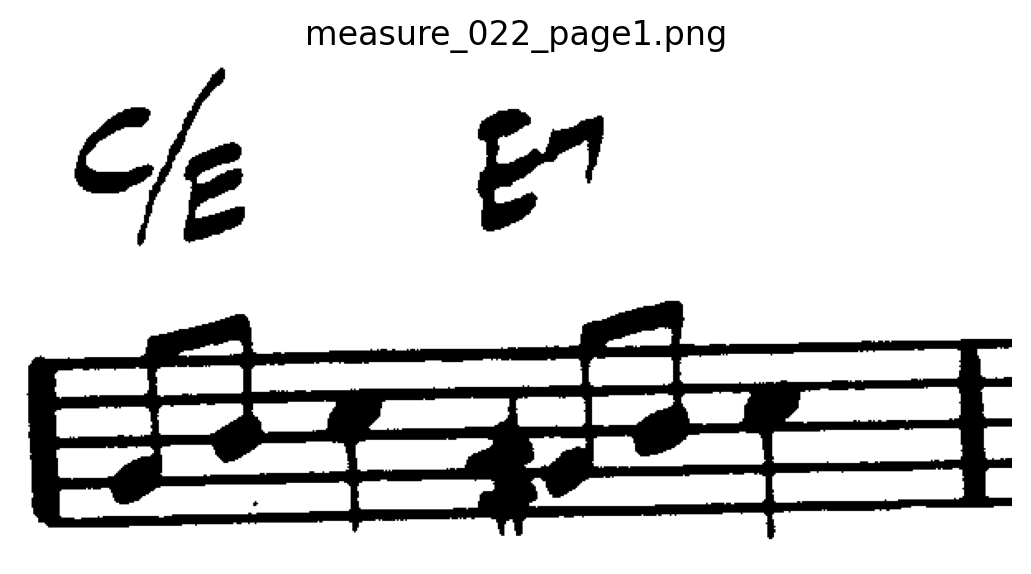

"Dm7" F2 F6"Dm6"



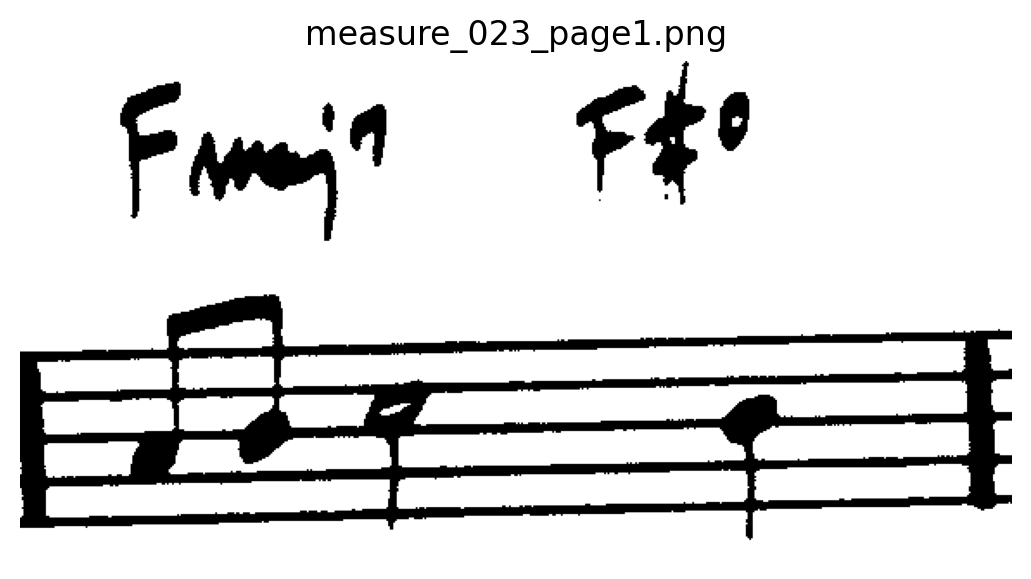

"Am" BA E4"E+" BA



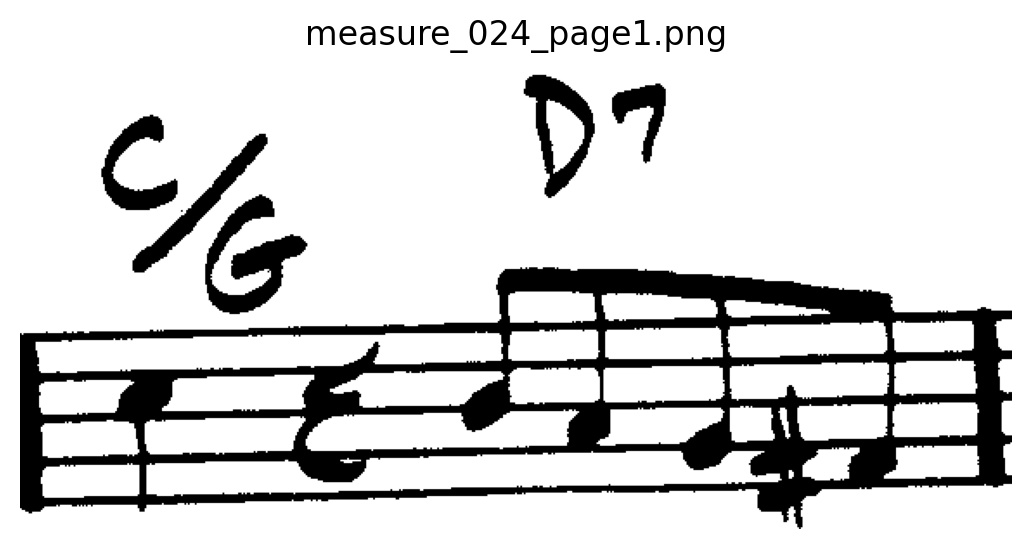

"Am7" E8"Am6"



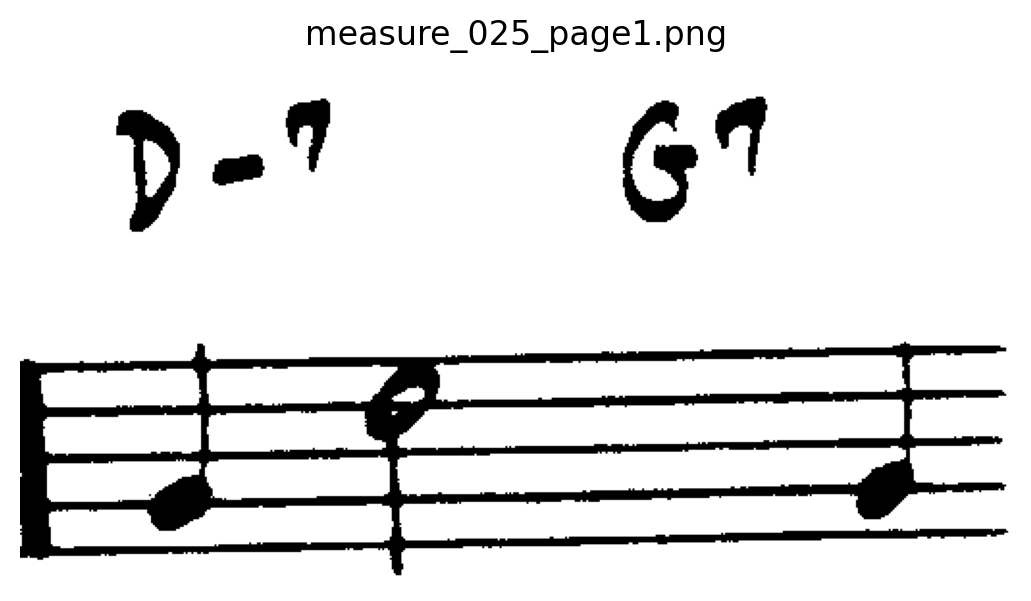

"Dm7" cB G4 cB



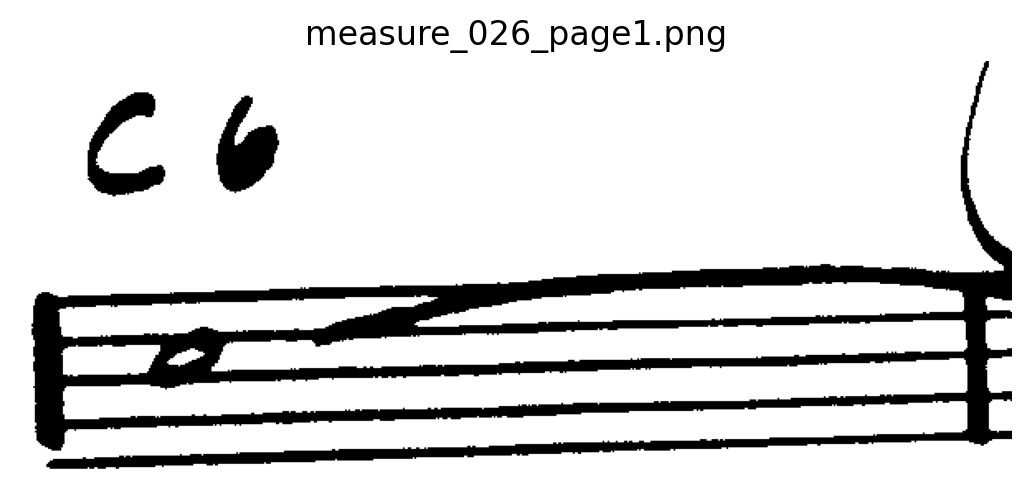

"G7" G2 G2- GABc



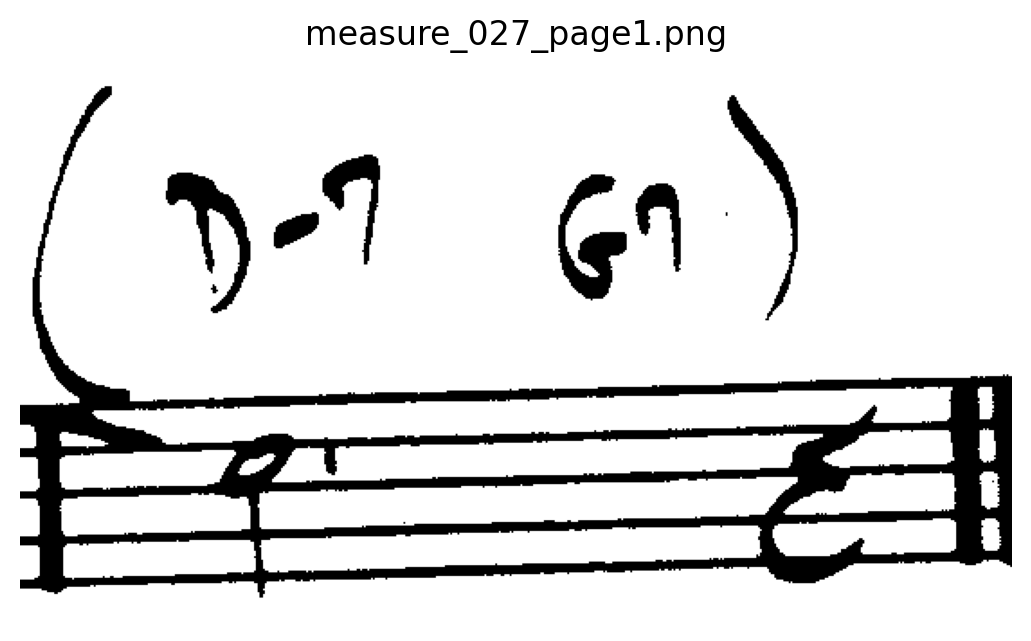

"Em7" d4"A7#9" c4

NO MORE PNG MEASURES
"Dm7" F6"G7" G2

NO MORE PNG MEASURES
"C" EB c4"C#dim7" E2

NO MORE PNG MEASURES
"Dm" FB c4"D#dim7" F2

NO MORE PNG MEASURES
"C/E" GB c2"E7" ^GB c2

NO MORE PNG MEASURES
"Fmaj7" AB c4"F#dim7" B2

NO MORE PNG MEASURES
"C/G" c2 z2"D7" BAG^F

NO MORE PNG MEASURES
"Dm" G2 d4"G7" G2

NO MORE PNG MEASURES
"C" c8"Am"

NO MORE PNG MEASURES
z8"Dm7""G7"



In [60]:
with open('Data/measures.json', 'r') as f:
    measure_dict = json.load(f)

song_name = 'Bewitched'

abc_length = len(measure_dict[song_name])
directory = Path(f'measures_pngs/{song_name}/final_measures')
png_length = len([f for f in directory.iterdir() if f.is_file()])

png_measures = sorted(os.listdir(f'measures_pngs/{song_name}/final_measures'))

print(f'ABC Measures: {abc_length}')
print(f'PNG Measures: {png_length}')

for i in range (max(abc_length, png_length)):
    if i < min(abc_length, png_length):
        img = mpimg.imread(f'measures_pngs/{song_name}/final_measures/{png_measures[i]}')
        plt.imshow(img)
        plt.title(png_measures[i])
        plt.axis('off')
        plt.show()
        print(measure_dict[song_name][i])
    elif i >= abc_length:
        img = mpimg.imread(f'measures_pngs/{song_name}/final_measures/{png_measures[i]}')
        plt.imshow(img)
        plt.title(png_measures[i])
        plt.axis('off')
        plt.show()
        print("NO MORE ABC MEASURES")
    elif i >= png_length:
        print("NO MORE PNG MEASURES")
        print(measure_dict[song_name][i])
    print()


In [42]:
# If you changed key and need to split the measures
# Paste the corrected ABC data into ABC_data/.../song.abc

song_name = 'Avalon'

if song_name[0].isalpha():
    folder = song_name[0]
else:
    folder = "0-9"
with open(f'Data/ABC_data/{folder}/{song_name}.abc', "r") as file:
    contents = file.read()
    contents.find('\n')

    for _ in range(2):
        idx = contents.find('V:')
        contents = contents[idx+4:]
song = contents

measure_list = []
while True:
    idx = song[2:].find('|')
    measure = song[:idx+1]
    song = song[idx+1:]

    if '\n' in measure:
        idx = measure.find('\n')
        measure = measure[idx+1:]
            
    if measure != ' ' and '%' not in measure:
        measure = measure.replace('|', '')
        measure = measure.replace('$', '')
        measure = measure.replace(':', '')
        while True:
            if measure[0] == ' ':
                measure = measure[1:]
            else:
                break
        measure_list.append(measure)
    if len(song) <= 9:
        break

with open('Data/measures.json', 'r') as file:
    data = json.load(file)

data[song_name] = measure_list

with open('Data/measures.json', 'w') as file:
    json.dump(data, file, indent=4)
